# Experiment on Womens' 8s winning speed at the World Championships and Olympics games
[![pdm-managed](https://img.shields.io/badge/pdm-managed-blueviolet)](https://pdm.fming.dev)

The experiment below tries to determine if the winning times at the olympic games and world championshps for Womens' 8os are getting quicker over the last 30 years.

Medal times for World Championships and Olympic Games since 1994 have been obtained from Wikipedia. 

A Pearson correlation coefficient is obtained to test for a correlation between Year and winning time. The hypothesis being that time decreases as the year increases, thus showing winning times are getting quicker.

A simple linear regression model is then built to find the relationship between winning time and year. The model deteremines that winning times are getting quicker by 0.36 seconds each year.

This notebook uses PDM for package management.
https://github.com/pdm-project/pdm

To install all relevant packages and set up a virtual environment, run the following code:

In [3]:
!Powershell.exe -Command "pdm install"

All packages are synced to date, nothing to do.


  All complete!




- Resolving packages from lockfile...
- Resolving packages from lockfile...
\ Resolving packages from lockfile...
| Resolving packages from lockfile...
/ Fetching hashes for resolved packages...



Import the relevant libraries:

In [11]:
import numpy as np
import pandas as pd

from matplotlib import pyplot

Winning times for wthe Womens' 8 since 1994 were obtained from Wikipedia and saved to a csv file (included in this solution).

Sources: 
 - https://en.wikipedia.org/wiki/World_Rowing_Championships
 - https://en.wikipedia.org/wiki/Rowing_at_the_Summer_Olympics

The following code loads the csv to a pandas dataframe, drops any null rows (2020 when covid prevented a championshop form happening) and converts the Gold medal time from minutes and seconds to seconds only.

In [12]:
df = pd.read_csv("Womens 8os results.csv", index_col=None)

df = df.dropna(how='any')
df['Gold Time']=df['Gold Time'].apply(lambda x: float(x.split(':')[0])*60+float(x.split(':')[1]))

df.head(10)

,Year,Gold Time,Silver Time,Bronze Time
0,2023,361.3,06:03.7,06:04.2
1,2022,361.1,06:05.0,06:07.5
2,2021,359.1,06:00.0,06:01.2
4,2019,356.9,05:56.9,06:01.9
5,2018,361.9,06:03.1,06:03.1
6,2017,366.4,06:07.1,06:07.3
7,2016,361.5,06:04.0,06:04.1
8,2015,365.6,06:05.6,06:09.0
9,2014,356.8,05:59.7,06:00.5
10,2013,362.1,06:07.0,06:09.3


A scatter plot of the gold medal winning times is made to look for outliers. A box plot is placed next to the scatter plot to confirm is the times could be outliers.

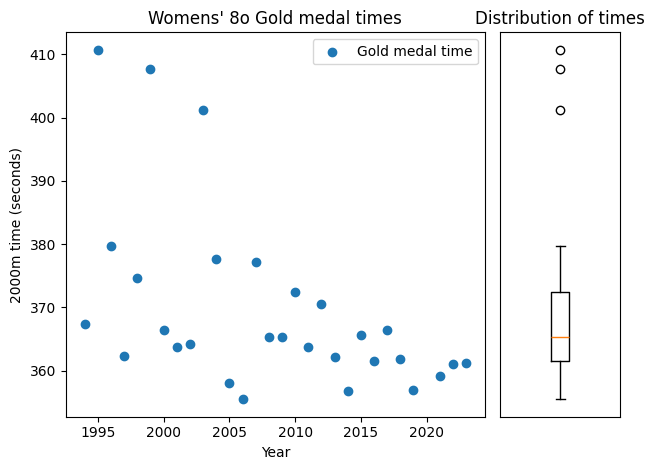

In [16]:
# plot
f, (a0, a1) = pyplot.subplots(1, 2, gridspec_kw={'width_ratios': [3.5, 1]})
a0.title.set_text("Womens' 8o Gold medal times")
a0.scatter(df['Year'], df['Gold Time'])
a0.set_xlabel('Year')
a0.set_ylabel('2000m time (seconds)')
a0.legend(['Gold medal time'])

a1.title.set_text("Distribution of times")
a1.boxplot(df['Gold Time'])
a1.axes.get_xaxis().set_visible(False)
a1.axes.get_yaxis().set_visible(False)
f.tight_layout()

pyplot.show()

For the boxplot, the orange line is the median, the box shows the Interquartile range (IQR) from the 25th percentile to the 75th percentile. The whiskers above and below the box show the boundaries of 1.5 IQR value. Anything ouside the whiskers can be considerred an outlier.

It looks like there are a few outliers. These might be down extreme weather conditions, giving a slower winning speed than is reflective of the winning boat. 

The following code removes any outliers that are greater than IQR * 1.5.

In [17]:
# Remove outliers

print("Old Shape: ", df.shape)

Q1 = df['Gold Time'].quantile(0.25)
Q3 = df['Gold Time'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)

upper_array = np.where(df['Gold Time']>=upper)[0]
upper_array = [y + 1 for y in upper_array]

df_cleaned = df.drop(index=upper_array)

print("New Shape: ", df_cleaned.shape)


Old Shape:  (29, 4)
New Shape:  (26, 4)


The following code creates a Pearson correlation coefficient to see if there is a correlation between year and speed. Ideally, I am looking for a negative correlation (as year increases, speed decreases), which can be interpreted as the winning boats are getting quicker.

In [18]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df_cleaned['Year'], df_cleaned['Gold Time'])
print(f'Pearsons correlation: {corr:3f}. P value: {p_value}')

Pearsons correlation: -0.467747. P value: 0.015969950898024835


The correlation is between -0.3 and -0.5, so can be interpreted as a medium negative correlation.

The P value is less than 0.05 so the correlation is statistically significant.

Now that a negative correlation has been determined, the following creates a simple linear regression model to determine the relationship between winning time and year.

In [9]:
# linear regression
from sklearn.linear_model import LinearRegression

X=df_cleaned['Year'].values.reshape(-1,1)
Y=df_cleaned['Gold Time'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, Y)

r_sq = model.score(X, Y)

print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.21878724960156692
intercept: [1095.67875993]
slope: [[-0.36354087]]


The linear regression returns a slope of -0.36, suggesting that boats are getting quicker by about 0.36 seconds each year.

The following chart plots the linear regression on the oringial scatter plot of times to visualise the gradient.

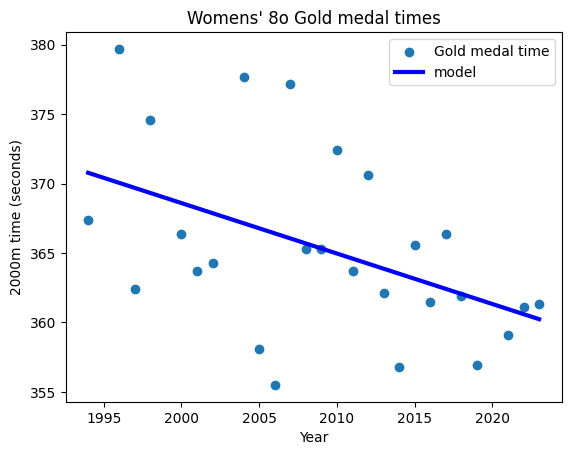

In [19]:
pyplot.scatter(X, Y)

# Make predictions using the testing set
y_pred = model.predict(X)
pyplot.title("Womens' 8o Gold medal times")
pyplot.plot(X, y_pred, color="blue", linewidth=3)
pyplot.legend(['Gold medal time','model'])
pyplot.xlabel('Year')
pyplot.ylabel('2000m time (seconds)')

pyplot.show()